<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


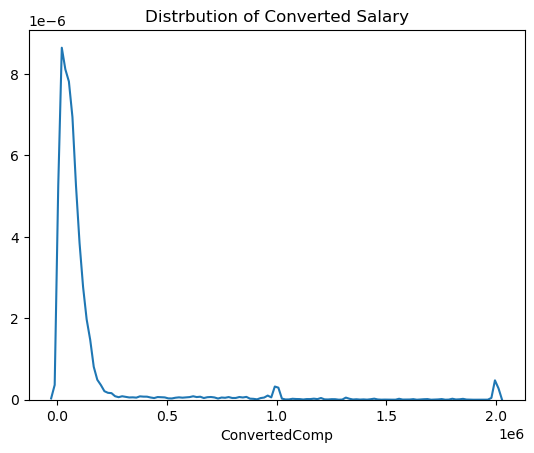

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.distplot(df['ConvertedComp'], hist=False)
plt.title("Distrbution of Converted Salary")
plt.show()


Plot the histogram for the column `ConvertedComp`.


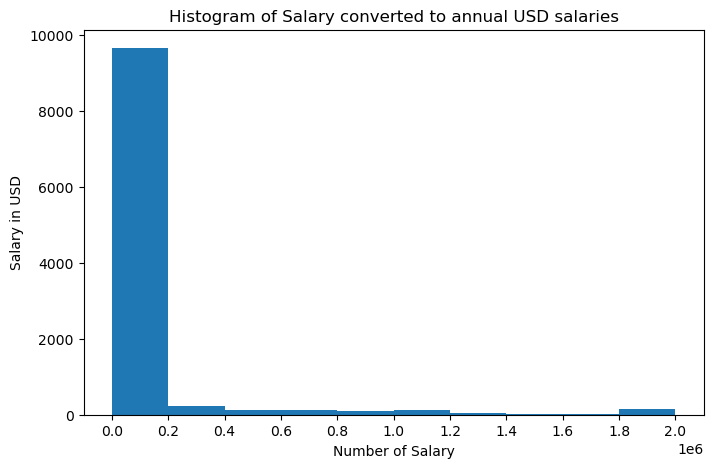

In [4]:
#Plot the histogram for the column ConvertedComp.
count,bin_edges=np.histogram(df['ConvertedComp'].dropna())

df['ConvertedComp'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Salary converted to annual USD salaries') # add a title to the histogram
plt.ylabel('Salary in USD') # add y-label
plt.xlabel('Number of Salary') # add x-label

plt.show()

What is the median of the column `ConvertedComp`?


In [5]:
ConvertedComp="ConvertedComp"
median_value=df[ConvertedComp].median()
print("The median value of ConvertedComp is",median_value)

The median value of ConvertedComp is 57745.0


How many responders identified themselves only as a **Man**?


In [6]:
manid=df["Gender"].value_counts()
print(manid)

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64


In [7]:
print("The number of responders that identify as Man is", 10480)

The number of responders that identify as Man is 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [37]:
print("The number of responders that identify as Woman is", 731)
df['ConvertedComp'].isnull().count()

df.groupby('Gender')['ConvertedComp'].median()

The number of responders that identify as Woman is 731


Gender
Man                                                            57744.0
Man;Non-binary, genderqueer, or gender non-conforming          59520.0
Non-binary, genderqueer, or gender non-conforming              67142.0
Woman                                                          57708.0
Woman;Man                                                      21648.0
Woman;Man;Non-binary, genderqueer, or gender non-conforming    30244.0
Woman;Non-binary, genderqueer, or gender non-conforming        65535.5
Name: ConvertedComp, dtype: float64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
Age="Age"

summary= df[Age].describe(percentiles=[.25, .5, .75])

print("The 5 number summary of the column Age is:")
print(summary)

The 5 number summary of the column Age is:
count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


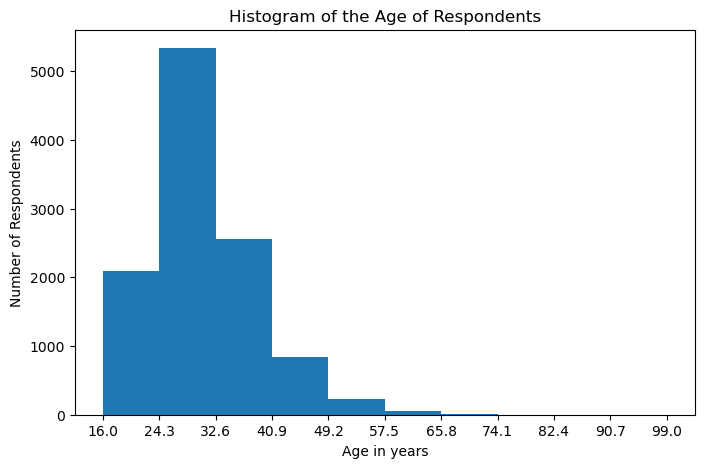

In [10]:
count,bin_edges=np.histogram(df[Age].dropna())

df[Age].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of the Age of Respondents')
plt.ylabel('Number of Respondents')
plt.xlabel('Age in years')

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


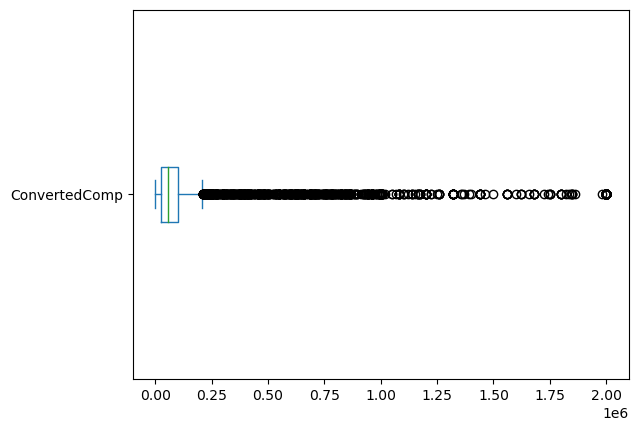

In [27]:
df[ConvertedComp].plot(kind="box", vert=False)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [15]:
q1=df[ConvertedComp].quantile(0.25)
q2=df[ConvertedComp].quantile(0.50)
q3=df[ConvertedComp].quantile(0.75)
IQR= q3-q1

print("Q1:", q1,"Q2:", q2,"Q3:", q3)
print("The IQR is", IQR)

Q1: 26868.0 Q2: 57745.0 Q3: 100000.0
The IQR is 73132.0


Find out the upper and lower bounds.


In [24]:
Upperb=q3+1.5*IQR
lowerb=q1-1.5*IQR

print("The upper bound is", Upperb)
print("The lower bound is", lowerb)

The upper bound is 209698.0
The lower bound is -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [22]:
outliers = ((df['ConvertedComp'] < (q1 - 1.5 * IQR)) | (df['ConvertedComp'] > (q3 + 1.5 * IQR))).sum()

print(outliers)

879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [25]:
filtered_df= df[(df[ConvertedComp]>= lowerb)&(df[ConvertedComp]<= Upperb)]

print(df[ConvertedComp].min())
print(df[ConvertedComp].max())
print(filtered_df[ConvertedComp].min())
print(filtered_df[ConvertedComp].max())

0.0
2000000.0
0.0
209356.0


In [40]:
newq2= filtered_df[ConvertedComp].quantile(0.50)
print("The new median is", newq2)

newmean= filtered_df[ConvertedComp].mean()
print("The new mean is", newmean)

The new median is 52704.0
The new mean is 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [29]:
numerical_col=filtered_df.select_dtypes(include=['int64','float64'])
print(numerical_col)

       Respondent  CompTotal  ConvertedComp  WorkWeekHrs  CodeRevHrs   Age
0               4    61000.0        61000.0         80.0         NaN  22.0
1               9   138000.0        95179.0         32.0        12.0  23.0
2              13    90000.0        90000.0         40.0         5.0  28.0
4              17    90000.0        65277.0         45.0         5.0  29.0
5              19     9500.0        31140.0          8.0         3.0  31.0
...           ...        ...            ...          ...         ...   ...
11392       25134      800.0         9600.0         56.0        14.0  32.0
11393       25136   130000.0       130000.0         40.0         NaN  36.0
11394       25137    74400.0        19880.0         40.0         5.0  25.0
11395       25138   105000.0       105000.0         40.0         5.0  34.0
11396       25141    80000.0        80371.0         42.5         2.0  25.0

[9703 rows x 6 columns]


In [30]:
CorrelationR_A=filtered_df['Age'].corr(filtered_df['Respondent'])
print("The correlation between Respondent and Age is", CorrelationR_A)

CorrelationCT_A=filtered_df['Age'].corr(filtered_df['CompTotal'])
print("The correlation between Age and CompTotal is", CorrelationCT_A)

CorrelationCC_A=filtered_df['Age'].corr(filtered_df['ConvertedComp'])
print("The correlation between Age and ConvertedComp is", CorrelationCC_A)

CorrelationWWH_A=filtered_df['Age'].corr(filtered_df['WorkWeekHrs'])
print("The correlation between Age and WorkWeekHrs is", CorrelationWWH_A)

CorrelationCRH_A=filtered_df['Age'].corr(filtered_df['CodeRevHrs'])
print("The correlation between Age and CodeRevHrs is", CorrelationCRH_A)

The correlation between Respondent and Age is 0.002180177911011859
The correlation between Age and CompTotal is 0.006336555779827662
The correlation between Age and ConvertedComp is 0.401821399712221
The correlation between Age and WorkWeekHrs is 0.032031815904989505
The correlation between Age and CodeRevHrs is -0.012877695845513685


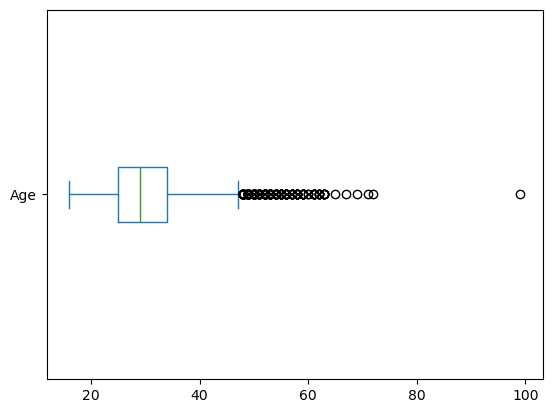

In [39]:
filtered_df[Age].plot(kind="box", vert=False)
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
